In [7]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy.linalg as la
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [4]:
#First solver

def solve_Fourier(h_heat_func, g_func, a=1, r=1, N=100, M=100):
    prod = (M+1)*(N+1) #gives the dimension of the matrix
    siste = N*(M+1) - 2 #last index we use the scheme on. The rest is known. We include this one
    x = np.linspace(0,1, M+1)
    y = np.linspace(0,1, N+1)
    xx, yy = np.meshgrid(x,y)
    
    h_heat = h_heat_func(xx,yy, prod) #function of two variables
    h_step = 1/M #equal in x and y direction
    
    g = g_func(xx, yy, prod) #vector of length prod.
    
    #Lager en svær matrise
    matrix = np.zeros((prod, prod))
    F_vec = np.zeros(prod)
    b_vec = np.zeros(prod)
    for i in range(M+1): #Definerer starten og slutten på matrisen vår.
        matrix[i,i] = 1 #Matrise
        matrix[-(i+1),-(i+1)] = 1
        F_vec[i] = g[i] #F vector, angir verdiene til U på \partial G. 
        F_vec[-(i+1)] = g[-(i+1)]

    for i in range(M+1, siste + 2): #Vi inkluderer siste + 1 som blir helt til høyre, nest øverste rad.
        if i % (M + 1) == 0 or i % (M + 1) == M:
            matrix[i,i] = 1
            F_vec[i] = g[i]
        else:
            matrix[i,i] = 2*a + 2
            matrix[i,i-1] = -a
            matrix[i,i+1] = -a
            matrix[i,i - M - 2] = -1
            matrix[i,i + M + 2] = -1
            b_vec[i] = h_step**2 * h_heat[i]
    
    
    U_vector = la.solve(matrix, F_vec + b_vec)
    U_reshaped = np.reshape(U_vector, (N+1, M+1))
    
    return xx, yy, U_reshaped

In [5]:
def h_heat_func1(xx,yy, prod):
    v =  np.ones(np.shape(xx))*10
    hh = np.reshape(v, prod)
    return hh

def h_heat_func2(xx,yy, prod):
    v = (5*xx)**2 + (5*yy)**2
    hh = np.reshape(v, prod)
    return hh


def g_func1(xx, yy, prod): #returnere vektor med lengde prod
    return np.ones(prod)

def g_func2(xx, yy, prod): #returnere vektor med lengde prod
    v = np.sin(xx*2*np.pi)
    g = np.reshape(v, prod)
    return g

    
xx, yy, U1 = solve_Fourier(h_heat_func1, g_func1, N=40, M=40)
xx, yy, U2 = solve_Fourier(h_heat_func2, g_func2, N=40, M=40)


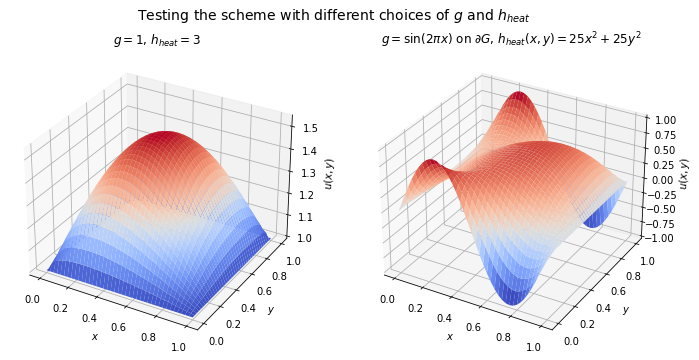

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), subplot_kw={"projection": "3d"})
ax[0].plot_surface(xx, yy, U1, cmap=cm.coolwarm)  
ax[1].plot_surface(xx, yy, U2, cmap=cm.coolwarm)  
fig.suptitle(r'Testing the scheme with different choices of $g$ and $h_{heat}$', fontsize=14)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y$')
ax[0].set_zlabel('$u(x,y)$')
ax[0].set_title(r'$g=1$, $h_{heat} = 3$')
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$y$')
ax[1].set_zlabel('$u(x,y)$')
ax[1].set_title(r'$g=\sin(2 \pi x)$ on $\partial G$, $h_{heat}(x,y) = 25x^2 + 25y^2$')
fig.tight_layout()

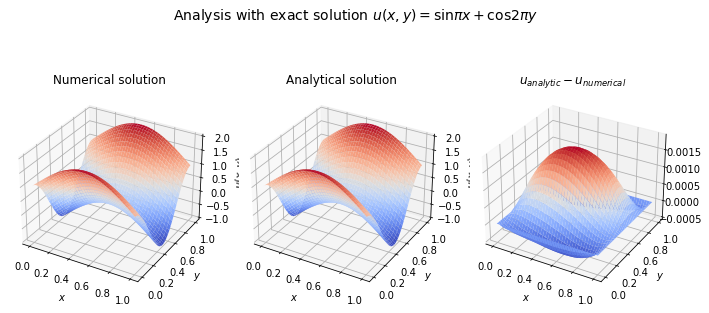

In [9]:
#New test function
def h_heat_prob1c(xx,yy, prod, r=1, a=1):
    v = (a+1) * np.pi**2* np.sin(np.pi*xx) + 4*np.pi**2*r**2 * np.cos(2*np.pi*yy) #Assuming a = 1
    hh = np.reshape(v, prod)
    return hh

def g_func_prob1c(xx, yy, prod): #returnere vektor med lengde prod
    v = np.sin(np.pi*xx) + np.cos(2*np.pi*yy)
    g = np.reshape(v, prod)
    return g

xx, yy, U_1c = solve_Fourier(h_heat_prob1c, g_func_prob1c, N=40, M=40)


#Analytical solution
U_1c_analytical = np.sin(np.pi*xx) + np.cos(2*np.pi*yy)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5), subplot_kw={"projection": "3d"})
fig.suptitle(r'Analysis with exact solution $u(x,y)=\sin \pi x + \cos 2 \pi y$', fontsize=14)
ax[0].plot_surface(xx, yy, U_1c, cmap=cm.coolwarm)
ax[1].plot_surface(xx, yy, U_1c_analytical, cmap=cm.coolwarm)
ax[2].plot_surface(xx, yy, U_1c_analytical - U_1c, cmap=cm.coolwarm)  
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y$')
ax[0].set_zlabel('$u(x,y)$')
ax[0].set_title(r'Numerical solution')
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$y$')
ax[1].set_zlabel('$u(x,y)$')
ax[1].set_title(r'Analytical solution')
ax[2].set_xlabel('$x$')
ax[2].set_ylabel('$y$')
ax[2].set_title(r'$u_{analytic} - u_{numerical}$')
fig.savefig('errorplots.pdf')
fig.tight_layout()

In [11]:
#Create an equal solver, but where we can modify h instead of M, N.
def solve_Fourier_h(h_heat_func, g_func, a=1, r=1, h_step=10**(-1)):
    x = np.arange(0,1, h_step)
    y = x
    M = len(x)-1
    N = len(y)-1
    prod = (M+1)*(N+1) #gives the dimension of the matrix
    siste = N*(M+1) - 2 #last index we use the scheme on. The rest is known. We include this one
    
    xx, yy = np.meshgrid(x,y)
    
    h_heat = h_heat_func(xx,yy, prod) #function of two variables
    
    g = g_func(xx, yy, prod) #vector of length prod.
    
    #Lager en svær matrise
    matrix = np.zeros((prod, prod))
    F_vec = np.zeros(prod)
    b_vec = np.zeros(prod)
    for i in range(M+1): #Definerer starten og slutten på matrisen vår.
        matrix[i,i] = 1 #Matrise
        matrix[-(i+1),-(i+1)] = 1
        F_vec[i] = g[i] #F vector, angir verdiene til U på \partial G. 
        F_vec[-(i+1)] = g[-(i+1)]

    for i in range(M+1, siste + 2): #Vi inkluderer siste + 1 som blir helt til høyre, nest øverste rad.
        if i % (M + 1) == 0 or i % (M + 1) == M:
            matrix[i,i] = 1
            F_vec[i] = g[i]
        else:
            matrix[i,i] = 2*a + 2
            matrix[i,i-1] = -a
            matrix[i,i+1] = -a
            matrix[i,i - M - 2] = -1
            matrix[i,i + M + 2] = -1
            b_vec[i] = h_step**2 * h_heat[i]
    
    
    U_vector = la.solve(matrix, F_vec + b_vec)
    U_reshaped = np.reshape(U_vector, (N+1, M+1))
    
    return xx, yy, U_reshaped

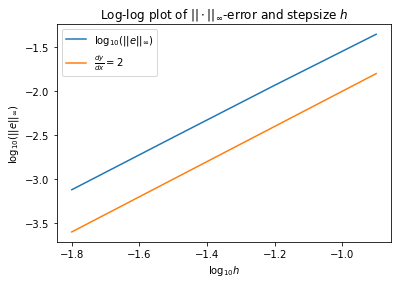

In [12]:
hs = np.logspace(-0.9, -1.8, 4)
errors = np.zeros(len(hs))
for i in range(len(hs)):
    xx, yy, U_1_test = solve_Fourier_h(h_heat_prob1c, g_func_prob1c, a=1, r=1,h_step=hs[i])
    U_1c_analytical = np.sin(np.pi*xx) + np.cos(2*np.pi*yy)
    errors[i] = np.max(np.abs(U_1c_analytical - U_1_test))

    
plt.title(r'Log-log plot of $||\cdot||_{\infty}$-error and stepsize $h$')
plt.plot(np.log10(hs), np.log10(errors) , label=r'$ \log_{10} (|| e ||_{\infty}) $')
plt.plot(np.log10(hs), 2*np.log10(hs), label=r'$\frac{dy}{dx}=2$')
plt.legend()
plt.xlabel(r'$ \log_{10} h $')
plt.ylabel(r'$ \log_{10} (|| e ||_{\infty}) $')
plt.savefig("Loglog.pdf")
plt.show()

In [13]:
#Solver modified to handle irregular grid at y=1. The only change is the definition of eta, and the "elif"-statement.
def solve_Fourier_1d(h_heat_func, g_func, a=1, r=1, M=100):
    
    h_step = 1/M 
    k_step = h_step*np.abs(r)
    N = int(1/k_step) + 1
    assert(1/k_step != int(1/k_step))
    
    l = h_step*np.sqrt(1 + r**2)
    eta = (1 -  int( 1/(np.abs(r)*h_step) ) * np.abs(r)*h_step ) /( h_step* np.abs(r))
    
    prod = (M+1)*(N+1) #gives the dimension of the matrix
    siste = N*(M+1) - 2 #last index we use the scheme on. The rest is known. We include this one
    x = np.linspace(0,1, M+1)
    x_modified = np.arange(eta*h_step - h_step, eta*h_step + M*h_step, h_step )
    y = np.arange(0,1, k_step) #length N if r is irrational
    y = np.append(y, 1) #add the last node, total of N+1
    
    xx, yy = np.meshgrid(x,y)
    xx_mod = xx.copy()
    xx_mod[-1,:] = np.arange(eta*h_step - h_step, eta*h_step + M*h_step, h_step )
    h_heat = h_heat_func(xx,yy, prod, r=r, a=a) #function of two variables
    
    
    g = g_func(xx_mod, yy, prod) #vector of length prod.
    
    #Lager en svær matrise
    matrix = np.zeros((prod, prod))
    F_vec = np.zeros(prod)
    b_vec = np.zeros(prod)
    for i in range(M+1): #Definerer starten og slutten på matrisen vår.
        matrix[i,i] = 1 #Matrise
        matrix[-(i+1),-(i+1)] = 1
        F_vec[i] = g[i] #F vector, angir verdiene til U på \partial G. 
        F_vec[-(i+1)] = g[-(i+1)]

    for i in range(M+1, siste + 2): #Vi inkluderer siste + 1 som blir helt til høyre, nest øverste rad.
        if i % (M + 1) == 0 or i % (M + 1) == M:
            matrix[i,i] = 1
            F_vec[i] = g[i]
        elif (N-1)*(M+1) + 1 <= i <= (N-1)*(M+1) + M - 1: #This checks if we are at the boundary.
            matrix[i,i] = 2*a + 2/(eta)
            matrix[i,i-1] = -a
            matrix[i,i+1] = -a
            matrix[i,i - M - 2] = -2/((eta + 1) )
            matrix[i,i + M + 2] = -2/(eta*(eta + 1))
            b_vec[i] = h_step**2 * h_heat[i]
        else:
            matrix[i,i] = 2*a + 2
            matrix[i,i-1] = -a
            matrix[i,i+1] = -a
            matrix[i,i - M - 2] = -1
            matrix[i,i + M + 2] = -1
            b_vec[i] = h_step**2 * h_heat[i]
            
    
    U_vector = la.solve(matrix, F_vec + b_vec)
    U_reshaped = np.reshape(U_vector, (N+1, M+1))
    
    g_reshaped = np.reshape(g_func(xx, yy, prod), (N+1, M+1))
    U_reshaped[-1,:] = g_reshaped[-1, :]
    
    return xx, yy, U_reshaped

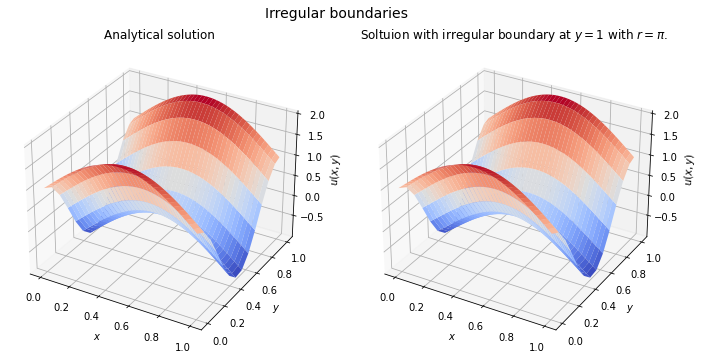

In [14]:
xx1, yy1, U_1d1 = solve_Fourier_1d(h_heat_prob1c, g_func_prob1c, a=1, r=np.pi, M=40)
#xx2, yy2, U_1d2 = solve_Fourier_1d(h_heat_prob1c, g_func_prob1c, a=1, r=np.sqrt(2), M=100)

U_1d_analytical = np.sin(np.pi*xx1) + np.cos(2*np.pi*yy1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), subplot_kw={"projection": "3d"})
ax[0].plot_surface(xx1, yy1, U_1d_analytical , cmap=cm.coolwarm)  
ax[1].plot_surface(xx1, yy1,U_1d1 , cmap=cm.coolwarm)  
fig.suptitle(r'Irregular boundaries', fontsize=14)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y$')
ax[0].set_zlabel('$u(x,y)$')
ax[0].set_title(r'Analytical solution')
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$y$')
ax[1].set_zlabel('$u(x,y)$')
ax[1].set_title(r'Soltuion with irregular boundary at $y=1$ with $r=\pi$.')
fig.tight_layout()

In [15]:
#Modify the scheme above to take in step size as parameter, instead of M, N.
def solve_Fourier_1d_h(h_heat_func, g_func, a=1, r=1, h_step=10**(-1)):
    x = np.arange(0,1, h_step)
    M = len(x)-1
    k_step = h_step*np.abs(r) #equal in x and y direction
    N = int(1/k_step) + 1
    assert(1/k_step != int(1/k_step))
    
    l = h_step*np.sqrt(1 + r**2)
    eta = (1 -   int( 1/(np.abs(r)*h_step) )  * np.abs(r)*h_step ) /( h_step* np.abs(r))
    
    prod = (M+1)*(N+1) #gives the dimension of the matrix
    siste = N*(M+1) - 2 #last index we use the scheme on. The rest is known. We include this one
    
    
    x = np.linspace(0,1, M+1)
    x_modified = np.arange(eta*h_step - h_step, eta*h_step + M*h_step, h_step )
    y = np.arange(0,1, k_step) #length N if r is irrational
    y = np.append(y, 1) #add the last node, total of N+1
    
    xx, yy = np.meshgrid(x,y)
    xx_mod = xx.copy()
    xx_mod[-1,:] = np.arange(eta*h_step - h_step, eta*h_step + M*h_step, h_step )
    
    
    h_heat = h_heat_func(xx,yy, prod , r=r, a=a) #function of two variables
    
    
    g = g_func(xx_mod, yy, prod) #vector of length prod.
    
    #Lager en svær matrise
    matrix = np.zeros((prod, prod))
    F_vec = np.zeros(prod)
    b_vec = np.zeros(prod)
    for i in range(M+1): #Definerer starten og slutten på matrisen vår.
        matrix[i,i] = 1 #Matrise
        matrix[-(i+1),-(i+1)] = 1
        F_vec[i] = g[i] #F vector, angir verdiene til U på \partial G. 
        F_vec[-(i+1)] = g[-(i+1)]

    for i in range(M+1, siste + 2): #Vi inkluderer siste + 1 som blir helt til høyre, nest øverste rad.
        if i % (M + 1) == 0 or i % (M + 1) == M:
            matrix[i,i] = 1
            F_vec[i] = g[i]
        elif (N-1)*(M+1) + 1 <= i <= (N-1)*(M+1) + M - 1:
            matrix[i,i] = 2*a + 2/(eta)
            matrix[i,i-1] = -a
            matrix[i,i+1] = -a
            matrix[i,i - M - 2] = -2/((eta + 1) )
            matrix[i,i + M + 2] = -2/(eta*(eta + 1))
            b_vec[i] = h_step**2 * h_heat[i]
        else:
            matrix[i,i] = 2*a + 2
            matrix[i,i-1] = -a
            matrix[i,i+1] = -a
            matrix[i,i - M - 2] = -1
            matrix[i,i + M + 2] = -1
            b_vec[i] = h_step**2 * h_heat[i]
            
    
    U_vector = la.solve(matrix, F_vec + b_vec)
    U_reshaped = np.reshape(U_vector, (N+1, M+1))
    
    g_reshaped = np.reshape(g_func(xx, yy, prod), (N+1, M+1))
    U_reshaped[-1,:] = g_reshaped[-1, :]
    
    return xx, yy, U_reshaped

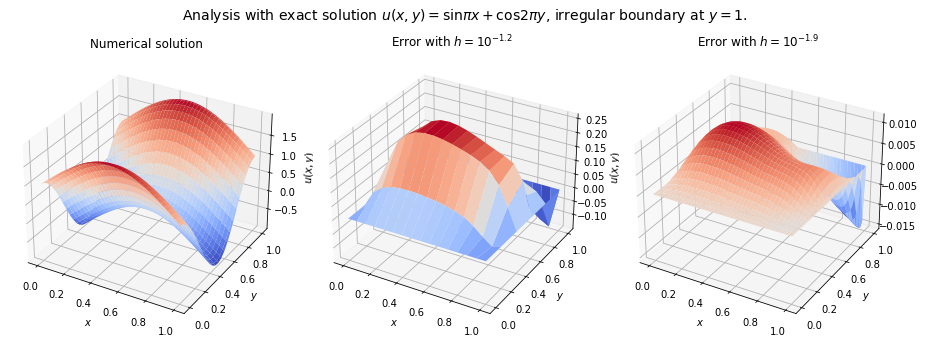

In [16]:
xx1, yy1, U_1d1 = solve_Fourier_1d_h(h_heat_prob1c, g_func_prob1c, a=1, r=np.pi, h_step=10**(-1.2))
xx2, yy2, U_1d2 = solve_Fourier_1d_h(h_heat_prob1c, g_func_prob1c, a=1, r=np.pi, h_step=10**(-1.9))

U_1d_analytical1 = np.sin(np.pi*xx1) + np.cos(2*np.pi*yy1)
U_1d_analytical2 = np.sin(np.pi*xx2) + np.cos(2*np.pi*yy2)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 5), subplot_kw={"projection": "3d"})
fig.suptitle(r'Analysis with exact solution $u(x,y)=\sin \pi x + \cos 2 \pi y$, irregular boundary at $y=1$.', fontsize=14)
ax[0].plot_surface(xx2, yy2, U_1d2, cmap=cm.coolwarm)  
ax[1].plot_surface(xx1, yy1, U_1d_analytical1 - U_1d1, cmap=cm.coolwarm)  
ax[2].plot_surface(xx2, yy2, U_1d_analytical2 - U_1d2, cmap=cm.coolwarm)  
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y$')
ax[0].set_zlabel('$u(x,y)$')
ax[0].set_title(r'Numerical solution')
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$y$')
ax[1].set_zlabel('$u(x,y)$')
ax[1].set_title(r'Error with $h=10^{-1.2}$')
ax[2].set_xlabel('$x$')
ax[2].set_ylabel('$y$')
ax[2].set_title(r'Error with $h=10^{-1.9}$')
fig.savefig('1d_plot.pdf')
fig.tight_layout()

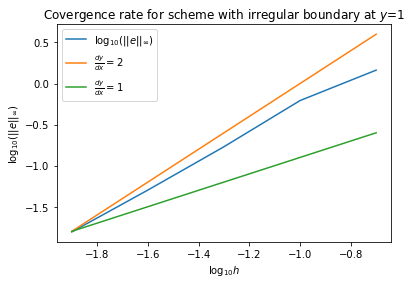

In [17]:
hs = np.logspace(-0.7, -1.9, 5)
errors = np.zeros(len(hs))
for i in range(len(hs)):
    xx, yy, U_1_test = solve_Fourier_1d_h(h_heat_prob1c, g_func_prob1c, a=1, r=np.pi, h_step=hs[i])
    U_1d_analytical = np.sin(np.pi*xx) + np.cos(2*np.pi*yy)
    errors[i] = np.max(np.abs(U_1d_analytical - U_1_test))


plt.title(r'Covergence rate for scheme with irregular boundary at $y$=1')
plt.plot(np.log10(hs), np.log10(errors) , label=r'$ \log_{10} (|| e ||_{\infty}) $')
plt.plot(np.log10(hs), 2*np.log10(hs) + 2, label=r'$\frac{dy}{dx}=2$')
plt.plot(np.log10(hs), np.log10(hs)+ 0.1, label = r'$\frac{dy}{dx}=1$' )
plt.legend()
plt.xlabel(r'$ \log_{10} h $')
plt.ylabel(r'$ \log_{10} (|| e ||_{\infty}) $')
plt.savefig("Loglog_1d.pdf")
plt.show()

In [19]:
def makeInternalgrid(M_test):
    h_step = 1/M_test
    x_list = []
    y_list = []
    eta_vec = np.zeros(M_test)
    for i in range(M_test):
        row =  np.arange(0, np.sqrt(1- (i*h_step)**2 ), h_step)
        col = np.ones(len(row))*(i*h_step) #corresponding y_vals
        x_list.append(row)
        y_list.append(col)
        
        eta_vec[i] = (np.sqrt(1- (i*h_step)**2 ) - row[-1])/h_step
    return x_list, y_list, eta_vec

    
#Create 2D array of the boundary points, for visualization.
def makeBoundary(M_test):
    h_step = 1/M_test
    x_curve1 = np.arange(1- h_step, -h_step , -h_step)
    y_curve1 = np.sqrt(1 - x_curve1**2)
    y_curve2 = np.arange(0, 1 , h_step)
    x_curve2 = np.sqrt(1 - y_curve2**2)
    
    points_UpScheme = np.array([x_curve1, y_curve1]).transpose()
    points_RightScheme = np.array([x_curve2, y_curve2]).transpose()

    return points_UpScheme, points_RightScheme,

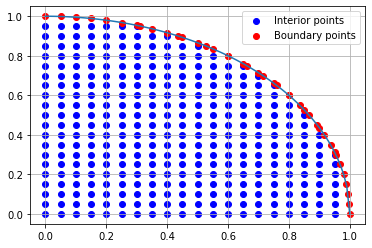

In [20]:
#Visualizing the grid
M = 20
x_list, y_list, eta_vec = makeInternalgrid(M) #Øker i høyden med rader!

lengths = [len(i) for i in x_list ]
indx_row = np.zeros(len(lengths), dtype=int) #gives index of first element in given row from the bottom
for i in range(len(lengths)-1):
    indx_row[i+1] = indx_row[i] + lengths[i]


for i in range(len(x_list)):
    if i==0:
        plt.scatter( x_list[i], y_list[i], color="blue", label="Interior points")
    else:
        plt.scatter( x_list[i], y_list[i], color="blue")
    

x_curve = np.linspace(0,1,100)
plt.plot(x_curve, np.sqrt(1 - x_curve**2) )


points_UpScheme, points_RightScheme  = makeBoundary(M)

plt.scatter(points_UpScheme[:,0], points_UpScheme[:, 1], color='red', label="Boundary points")
plt.scatter(points_RightScheme[:,0], points_RightScheme[:, 1], color='red')
plt.legend()
plt.savefig('Grid_2.pdf')
plt.grid()
plt.show()

In [21]:
def indxs_schemes(x_list): #returns three arrays, which denote which indices need modified scheme for upward and right
    lenx = len(x_list)     # the indx_row vector gives the index of the first element in the given row
    num_Ups = np.zeros(lenx, dtype=int)

    for row_idx in range(lenx):      
        lengths = [len(i) for i in x_list ]
        if row_idx == lenx-1:
             num_Ups[row_idx] = lengths[row_idx]
        else:
            num_Ups[row_idx] = lengths[row_idx] - lengths[row_idx+1]
            
    #Numerating the indx of beginning of each row
    indx_row = np.zeros(len(lengths), dtype=int) #gives index of first element in given row from the bottom
    for i in range(len(lengths)-1):
        indx_row[i+1] = indx_row[i] + lengths[i]
    
    indx_with_Ups= []
    for i in range(lenx-1):
        for j in range(num_Ups[i]):
            indx_with_Ups.append( indx_row[i+1]-(j+1))
    
    #add indexes for last row
    indx_with_Ups.sort()
    last = indx_with_Ups[-1]
    for i in range(len(x_list[-1])):
        indx_with_Ups.append(last + i + 1)
    
    indx_with_Rights = np.zeros(lenx, dtype=int)
    indx_with_Rights[:-1] = indx_row[1:] - np.ones(lenx - 1)
    indx_with_Rights[-1] = indx_with_Ups[-1]
    return np.array(indx_with_Ups), indx_with_Rights, indx_row

In [26]:
h_step =1/M
def g(x,y):
    return np.sin(x + y)

#Make h_heat vector
def h_func(x, y):
    return 2*np.sin(x + y)

x_list, y_list, eta_vec = makeInternalgrid(M) #Øker i høyden med rader!
points_UpScheme, points_RightScheme  = makeBoundary(M)

lengths = [len(i) for i in x_list ]
indx_row = np.zeros(len(lengths), dtype=int) #gives index of first element in given row from the bottom
for i in range(len(lengths)-1):
    indx_row[i+1] = indx_row[i] + lengths[i]

indx_with_Ups, indx_with_Rights, indx_row = indxs_schemes(x_list)

length_T = indx_with_Rights[-1] + 1


#MAKE DICTIONARYS TO MORE EASILY NAVIGATE BETWEEN QUANTITIES
indexTomn = {}
for l in range(length_T):
    #Finding row and column. Useful.
    for j in range(len(indx_row)):
        if l >= indx_row[-1]:
            indexTomn[l] = (len(indx_row) - 1, l - indx_row[-1] )
            break
        if l < indx_row[j+1]: #when next row 
            indexTomn[l] = (j, l - indx_row[j] )
            break
mnToIndex = dict((v,k) for k,v in indexTomn.items()) #From tuple to index
mnToPoint = {}
indexToPoint = {}
for i in mnToIndex: #i is coordinates
    mnToPoint[i] = (x_list[i[0]][i[1]] , y_list[i[0]][i[1]])
for i in indexTomn:
    indexToPoint[i] = mnToPoint[indexTomn[i]]


    
    
#Make US vector and eta_2 vec
US = np.zeros(length_T)
eta_2 = np.ones(length_T)
for i in range(len(indx_with_Ups)):
    if indx_with_Ups[i] in indx_row:
        continue
    col = indexTomn[indx_with_Ups[i]][1]
    eta_2[indx_with_Ups[i]] = eta_vec[col]
    x_u = indexToPoint[indx_with_Ups[i]][0]
    y_u = np.sqrt(1- x_u**2)
    US[indx_with_Ups[i]] = 2/( eta_vec[col]*(1 + eta_vec[col]) ) * g(x_u ,y_u)
    
#Make RS vector and eta_1 vec
RS = np.zeros(length_T)
eta_1 = np.ones(length_T)
for i in range(1, len(indx_with_Rights)): #dont need first right, since at bottom.
    y_r = indexToPoint[indx_with_Rights[i]][1]
    x_r = np.sqrt(1-y_r**2)
    RS[indx_with_Rights[i]] = 2/(eta_vec[i]*(1+eta_vec[i]))*g(x_r, y_r )
    eta_1[indx_with_Rights[i]] = eta_vec[i]
    
    
#MAAKING MATRIX

full_matrix = np.zeros((length_T, length_T))
RHS = np.zeros(length_T) #Make RHS into vector
g_RHS = np.zeros(length_T)
for l in range(indx_row[1]): #create first diagonal for first row in grid
    full_matrix[l, l] = 1
    g_RHS[l] = g(indexToPoint[l][0], indexToPoint[l][1])

for l in range(indx_row[1], length_T):
    if (l in indx_row): #check if at x=0.
        full_matrix[l, l] = 1
        g_RHS[l] = g(indexToPoint[l][0], indexToPoint[l][1])
        continue
    RHS[l] = -h_step**2 * h_func(indexToPoint[l][0], indexToPoint[l][1]) #Make add value to heat func vector.
    
    
    if (l in indx_with_Ups) and (l in indx_with_Rights):
        #current
        full_matrix[l, l] = -2*(1/eta_1[l] + 1/eta_2[l])
        #left
        full_matrix[l, l-1] = 2/(1 + eta_1[l])
        #down
        c = indexTomn[l] #current coordinates
        d = mnToIndex[(c[0] - 1, c[1])]
        full_matrix[l, d] = 2/(1 + eta_2[l])
        
    elif (l in indx_with_Ups):
        #current
        full_matrix[l, l] = -2*(1/eta_1[l] + 1/eta_2[l])
        #left
        full_matrix[l, l-1] = 2/(1 + eta_1[l])
        #down
        c = indexTomn[l] #current coordinates
        d = mnToIndex[(c[0] - 1, c[1])]
        full_matrix[l, d] = 2/(1 + eta_2[l])
        #right
        full_matrix[l, l + 1] = 2/(eta_1[l]*(1 + eta_1[l]) )

    elif (l in indx_with_Rights):
        #current
        full_matrix[l, l] = -2*(1/eta_1[l] + 1/eta_2[l])
        #left
        full_matrix[l, l-1] = 2/(1 + eta_1[l])
        #down
        c = indexTomn[l] #current coordinates
        d = mnToIndex[(c[0] - 1, c[1])]
        full_matrix[l, d] = 2/(1 + eta_2[l])
        #up
        c = indexTomn[l] #current coordinates
        u = mnToIndex[(c[0] + 1, c[1])]
        full_matrix[l, u] = 2/(eta_2[l]*(1 + eta_2[l]) )

    else:
        #current
        full_matrix[l, l] = -2*(1/eta_1[l] + 1/eta_2[l])
        #left
        full_matrix[l, l-1] = 2/(1 + eta_1[l])
        #right
        full_matrix[l, l + 1] = 2/(eta_1[l]*(1 + eta_1[l]) )
        #down
        c = indexTomn[l] #current coordinates
        d = mnToIndex[(c[0] - 1, c[1])]
        full_matrix[l, d] = 2/(1 + eta_2[l])
        #up
        c = indexTomn[l] #current coordinates
        u = mnToIndex[(c[0] + 1, c[1])]
        full_matrix[l, u] = 2/(eta_2[l]*(1 + eta_2[l]) )


T_vec = la.solve(full_matrix, RHS - US - RS + g_RHS )
T_matr_mod = np.zeros((M, M))
p=0
for i in range(len(lengths)):
    q = p + lengths[i]
    T_matr_mod[i, : lengths[i]] = T_vec[p : q]
    p = q
    

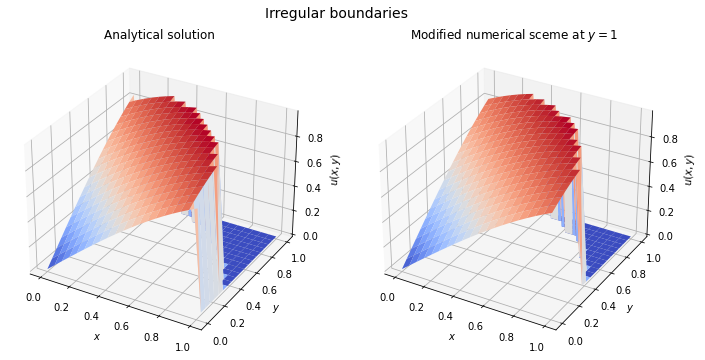

In [27]:
x_mod = np.linspace(0, 1, M)
y_mod = np.linspace(0, 1, M)
xx_mod, yy_mod = np.meshgrid(x_mod,y_mod)

analytical_1 = g(xx_mod,yy_mod)
for i in range(len(analytical_1)):
    for j in range(len(analytical_1[0])):
        if xx_mod[i, j]**2 + yy_mod[i, j]**2 > 1:
            analytical_1[i,j ] = 0

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), subplot_kw={"projection": "3d"})
ax[0].plot_surface(xx_mod, yy_mod, analytical_1 , cmap=cm.coolwarm)
ax[1].plot_surface(xx_mod, yy_mod, T_matr_mod , cmap=cm.coolwarm)
fig.suptitle(r'Irregular boundaries', fontsize=14)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y$')
ax[0].set_zlabel('$u(x,y)$')
ax[0].set_title(r'Analytical solution')
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$y$')
ax[1].set_zlabel('$u(x,y)$')
ax[1].set_title(r'Modified numerical sceme at $y=1$')
fig.tight_layout()

### Fattened Boundary

In [28]:
def makeInternalgrid_fat(M_test):
    h_step = 1/M_test
    x_list = []
    y_list = []
    for i in range(M_test+1):
        row =  np.arange(0, np.sqrt((1+ h_step)**2- (i*h_step)**2 ), h_step)
        col = np.ones(len(row))*(i*h_step) #corresponding y_vals
        x_list.append(row)
        y_list.append(col)
    return x_list, y_list

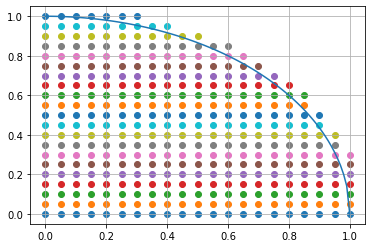

In [29]:
#Visualizing the grid
M_fat = 20

x_list, y_list = makeInternalgrid_fat(M_fat) #Øker i høyden med rader!


indx_row = np.zeros(len(lengths), dtype=int) #gives index of first element in given row from the bottom
for i in range(len(lengths)-1):
    indx_row[i+1] = indx_row[i] + lengths[i]


for i in range(len(x_list)):
    plt.scatter( x_list[i], y_list[i] )

x_curve = np.linspace(0,1,100)
plt.plot(x_curve, np.sqrt(1 - x_curve**2) )
plt.grid()
plt.show()

In [30]:
#DICTIONARIES
length_T_fat = 0
for j in range(len(x_list)):
    length_T_fat += len(x_list[j])

lengths_fat = [len(i) for i in x_list ]
indx_row_fat = np.zeros(len(lengths_fat), dtype=int) #gives index of first element in given row from the bottom
for i in range(len(lengths_fat)-1):
    indx_row_fat[i+1] = indx_row_fat[i] + lengths_fat[i]

    
indexTomn_fat = {} 
for l in range(length_T_fat):
    #Finding row and column. Useful.
    for j in range(len(indx_row_fat)):
        if l >= indx_row_fat[-1]:
            indexTomn_fat[l] = (len(indx_row_fat) - 1, l - indx_row_fat[-1] )
            break
        if l < indx_row_fat[j+1]: #when next row 
            indexTomn_fat[l] = (j, l - indx_row_fat[j] )
            break

mnToIndex_fat = dict((v,k) for k,v in indexTomn_fat.items()) #From tuple to index

#Point
indexToPoint_fat = {}
for i in indexTomn_fat:
    m, n = indexTomn_fat[i]
    indexToPoint_fat[i] = (x_list[m][n], y_list[m][n])

mnToPoint_fat = {}
for mn in mnToIndex_fat:
    m, n = mn
    mnToPoint_fat[mn] = (x_list[m][n], y_list[m][n])

In [31]:
#Finding the points of the boundary

mn_outherbndry = []
mn_innerbndry = []
for mn in mnToPoint_fat:
    m, n = mn
    l = (m, n-1) not in mnToPoint_fat #need point (m, n) as key in dictionary
    r = (m, n+1) not in mnToPoint_fat
    u = (m+1, n) not in mnToPoint_fat
    d = (m-1, n) not in mnToPoint_fat
    if any((l, d)):
        mn_innerbndry.append(mn)
    elif any((r, u)):
        mn_outherbndry.append(mn)
    
#Make an example boundary function and heat function
def g(x, y):
    return np.sin(x + y)

def h_heat_func_2(x, y):
    return  2*np.sin(x + y)

#Creating the matrix
matrix_fat = np.zeros((length_T_fat, length_T_fat))

#Two right hand side vectors, one representing the RHS in the equation, and one for known boundary conditions.
g_RHS = np.zeros(length_T_fat)
RHS =  np.zeros(length_T_fat)

for l in range(length_T_fat):
    
    mn = indexTomn_fat[l] #transform index to a point of the form (m, n)
    if mn in mn_outherbndry: #CHECK IF POINT ON OUTER BOUNDARY
        matrix_fat[l,l] = 1
        
        #Find projected value
        x_0, y_0 = mnToPoint_fat[mn]
        if np.isclose(x_0, 0, 10**(-5)): #If x is zero
            x_p, y_p = 1, 0
        else:
            theta = np.arctan(y_0 / x_0) #angle
            x_p, y_p = np.cos(theta), np.sin(theta)
            g_RHS[l] = g(x_p, y_p)
        
    elif mn in mn_innerbndry: #CHECK IF POINT ON INNER BOUNDARY
        matrix_fat[l,l] = 1
        x_0, y_0 = indexToPoint_fat[l]
        g_RHS[l] = g(x_0, y_0)
        
         
    else: #IF INTERIOR POINT, RUN STANDARD SCHEME
        matrix_fat[l,l] = - 4
        matrix_fat[l,l-1] = 1
        matrix_fat[l,l+1] = 1
        
        m, n = mn
        x_0, y_0 = indexToPoint_fat[l]
        up_idx = mnToIndex_fat[(m+1, n)]
        down_idx = mnToIndex_fat[(m-1, n)]
        
        matrix_fat[l,up_idx] = 1
        matrix_fat[l, down_idx] = 1
        
        RHS[l] = - h_step**2 * h_heat_func_2(x_0, y_0)

T_vec2 = la.solve(matrix_fat, RHS + g_RHS)
T_matr2 = np.zeros((M_fat+1, M_fat+1))
p=0
for i in range(len(lengths_fat)):
    q = p + lengths_fat[i]
    T_matr2[i, : lengths_fat[i]] = T_vec2[p : q]
    p = q

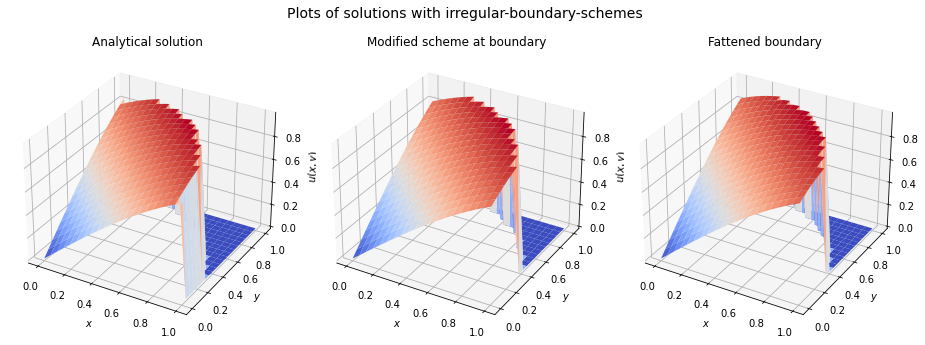

In [33]:
#Plotting together
x = np.linspace(0, 1, M_fat + 1)
y = np.linspace(0, 1, M_fat + 1)
xx, yy = np.meshgrid(x,y)


analytical_2 = g(xx,yy)
for i in range(len(analytical_2)):
    for j in range(len(analytical_2[0])):
        if xx[i, j]**2 + yy[i, j]**2 > 1:
            analytical_2[i,j ] = 0

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 5), subplot_kw={"projection": "3d"})
fig.suptitle(r'Plots of solutions with irregular-boundary-schemes', fontsize=14)
ax[0].plot_surface(xx, yy, analytical_2 , cmap=cm.coolwarm)
ax[1].plot_surface(xx_mod, yy_mod, T_matr_mod , cmap=cm.coolwarm)
ax[2].plot_surface(xx, yy, T_matr2 , cmap=cm.coolwarm)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y$')
ax[0].set_zlabel('$u(x,y)$')
ax[0].set_title(r'Analytical solution')
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$y$')
ax[1].set_zlabel('$u(x,y)$')
ax[1].set_title(r'Modified scheme at boundary')
ax[2].set_xlabel('$x$')
ax[2].set_ylabel('$y$')
ax[2].set_title(r'Fattened boundary')
fig.savefig('2_plots.pdf')
fig.tight_layout()

## Problem 3

In [11]:
#Define constants
T=1
M=100
N=1000

#Define some different choices of a
def simple_a(x, t=0):
    return np.array((x-1/3)*(x-2/3))

def simple_a2(x, t=0):
    return np.array((x-1/4)*(x-3/4))

def simple_a3(x, t=0):
    return simple_a(x**2, t)

#a+ and a-
def pos_a(x, a):
    a_vec=a(x)
    null_vec=np.zeros(len(x))
    arr=np.maximum(null_vec, a_vec)
    return arr

def neg_a(x, a):
    null_vec=np.zeros(len(x))
    a_vec=-a(x)
    arr=np.maximum(null_vec, a_vec)
    return arr

#Matrix creator
def tridiag(lower, diag, upper):
    return np.diag(lower, -1) + np.diag(diag) + np.diag(upper, 1)    

#Plot func
def plot_solutionTest(U1, U2=np.zeros((1,1)), U3=np.zeros((1,1)), angle=-30, filename="pdfName", name="Analytic function"):
    x_len = len(U1[:, ])
    t_len = len(U1[0])
    x=np.linspace(0, 1, x_len) 
    t=np.linspace(0, T, t_len)
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 5), subplot_kw={"projection": "3d"})
    fig.suptitle(name, fontsize=14)
    tt, xx = np.meshgrid(t, x)
    ax[0].plot_surface(tt, xx, U1, cmap=cm.coolwarm)
    ax[0].set_xlabel('t')
    ax[0].set_ylabel('x')
    ax[0].set_zlabel('u')
    ax[0].set_title(r'Numerical solution')
    ax[0].view_init(azim=angle)        # Rotate the figure
    if np.shape(U2)==np.shape(U1):
        ax[1].plot_surface(tt, xx, U2, cmap=cm.coolwarm)
        ax[1].set_xlabel('t')
        ax[1].set_ylabel('x')
        ax[1].set_zlabel('u')
        ax[1].set_title(r'Exact solution')
        ax[1].view_init(azim=angle)
    if np.shape(U3)==np.shape(U1):
        ax[2].plot_surface(tt, xx, U3, cmap=cm.coolwarm)
        ax[2].set_xlabel('t')
        ax[2].set_ylabel('x')
        ax[2].set_zlabel('u')
        ax[2].set_title(r'$u_{analytic} - u_{numerical}$')
        ax[2].view_init(azim=angle)              
    fig.savefig(filename)
    fig.tight_layout()

In [12]:
#Initial conditions for the solution with no RHS
def init_noRHS1(x):
    return np.exp(-x)*np.sin(2*np.pi*x)

def init_noRHS2(x):
    return np.cos(2*np.pi*x)

def init_noRHS3(x):
    return np.exp(-x**2)*np.sin(2*np.pi*(x-simple_a(x)))

#Boundary x=0
def bc_noRHS(t, init, a):
    return init(-a(0)*t) 

#t=0 without a RHS, u_0(x)
def exact_sol(f, x, a, t):
    tt, xx=np.meshgrid(t, x)
    return f(xx-a(xx, tt)*tt)

#Tests with RHS
#RHS
def withRHS1(t, x, a):
    tt, xx=np.meshgrid(t, x)
    return -2*tt*np.cos(2*np.pi*xx)*np.exp(-tt**2) - a(xx)*2*np.pi*np.sin(2*np.pi*xx)*np.exp(-tt**2)

#Exact function
def u_exact1(f, x, a, t):
    #tt, xx=np.meshgrid(t, x)
    return np.cos(2*np.pi*x)*np.exp(-t**2)

#Initial and boundary conditions
def init_RHS(x):
    return u_exact1(0, x, 0, 0)

def bc_RHS(t, init, a):
    return u_exact1(0, 0, 0, t)

def withRHS2(t, x, a):
    tt, xx=np.meshgrid(t, x)
    return -np.sin(2*np.pi*xx)*np.exp(-tt) + a(xx)*2*np.pi*np.cos(2*np.pi*xx)*np.exp(-tt)

def u_exact2(f, x, a, t):
    return np.sin(2*np.pi*x)*np.exp(-t)

def init_RHS2(x):
    return u_exact2(0, x, 0, 0)

def bc_RHS2(t, init, a):
    return u_exact2(0, 0, 0, t)

def withRHS3(t, x, a):
    tt, xx=np.meshgrid(t, x)
    return 2*np.pi*np.cos(2*np.pi*xx)*np.cos(2*np.pi*tt) - a(xx)*2*np.pi*np.sin(2*np.pi*xx)*np.sin(2*np.pi*tt)

def u_exact3(f, x, a, t):
    return np.cos(2*np.pi*x)*np.sin(2*np.pi*t)

def init_RHS3(x):
    return u_exact3(0, x, 0, 0)

def bc_RHS3(t, init, a):
    return u_exact3(0, 0, 0, t)

In [13]:
#Create the scheme
def upwind(M, T, N, u_init, u_bc, a=simple_a, RHS_func=lambda t, x, a:np.zeros((len(x), len(t)))):
    
    h=1/M
    k=T/N
    
    t=np.linspace(0, T, N+1)
    x=np.linspace(0, 1, M+1)
    
    U=np.zeros((M+1, N+1))

    U[:, 0]=u_init(x)
    
    lower=(k/h)*pos_a(x, a)[1:]
    middle=np.ones(len(x))-(k/h)*pos_a(x, a)[:]-(k/h)*neg_a(x, a)[:]
    upper=(k/h)*neg_a(x, a)[:-1]
    
    A=tridiag(lower, middle, upper)

    CFL=k/h*a(x)    
    
    F=RHS_func(t, x, a)
    
    for n in range(N):

        U[:, n+1]=A@U[:, n] + k*F[:, n]
        U[0, n+1]=u_bc(t[n+1], u_init, a) 
    

    return U, CFL

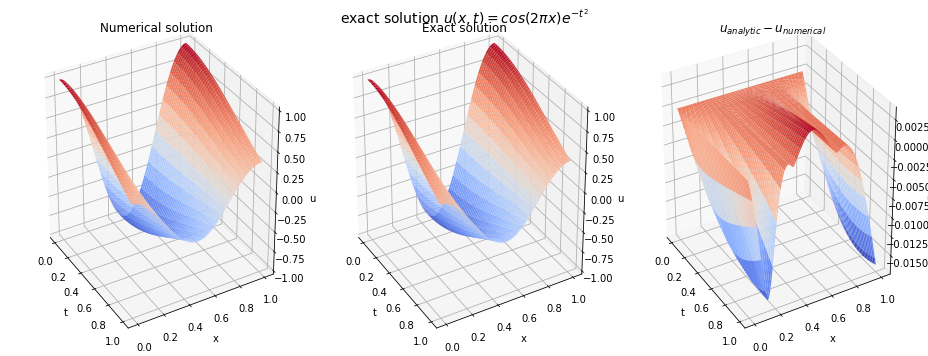

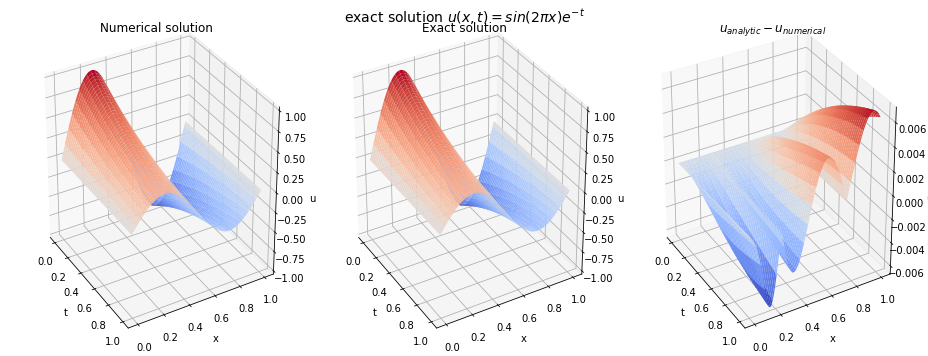

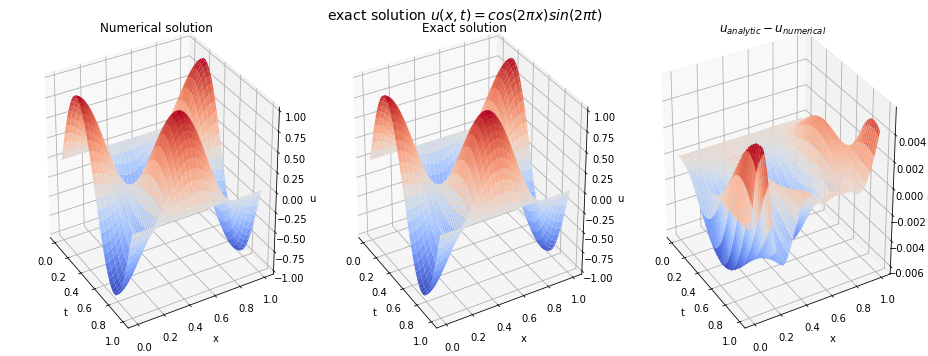

In [17]:
#For simplicity
x_testing=np.linspace(0, 1, M+1)
t_testing=np.linspace(0, T, N+1)

t_global, x_global=np.meshgrid(t_testing, x_testing)
'''
#Numerical solution without right hand side
noRHS1, noRHSCFL1=upwind(M, T, N, init_noRHS1, bc_noRHS)

#Exact solution
exact1=exact_sol(init_noRHS1, x_global, simple_a, t_global)

#Error
diff1=noRHS1-exact1
'''

#Test with right hand sides
RHS1, RHS1CFL=upwind(M, T, N, init_RHS, bc_RHS, a=simple_a, RHS_func=withRHS1)


exactRHS1=u_exact1(0, x_global, simple_a, t_global)

diffRHS=RHS1 - exactRHS1


RHS2, RHS2CFL=upwind(M, T, N, init_RHS2, bc_RHS2, a=simple_a2, RHS_func=withRHS2)

exactRHS2=u_exact2(0, x_global, simple_a2, t_global)

diffRHS2=RHS2 - exactRHS2


RHS3, RHS3CFL=upwind(M, T, N, init_RHS3, bc_RHS3, a=simple_a3, RHS_func=withRHS3)


exactRHS3=u_exact3(0, x_global, simple_a3, t_global)

diffRHS3=RHS3 - exactRHS3

plot_solutionTest(RHS1, exactRHS1, diffRHS, angle=-30, filename="numeric upwind vs exact test 1", name=r'exact solution $u(x,t)=cos(2\pi x)e^{-t^2}$')
plot_solutionTest(RHS2, exactRHS2, diffRHS2, angle=-30, filename="numeric upwind vs exact test 2", name=r'exact solution $u(x,t)=sin(2\pi x)e^{-t}$ ')
plot_solutionTest(RHS3, exactRHS3, diffRHS3, angle=-30, filename="numeric upwind vs exact test 3", name=r'exact solution $u(x,t)=cos(2\pi x)sin(2\pi t)$')

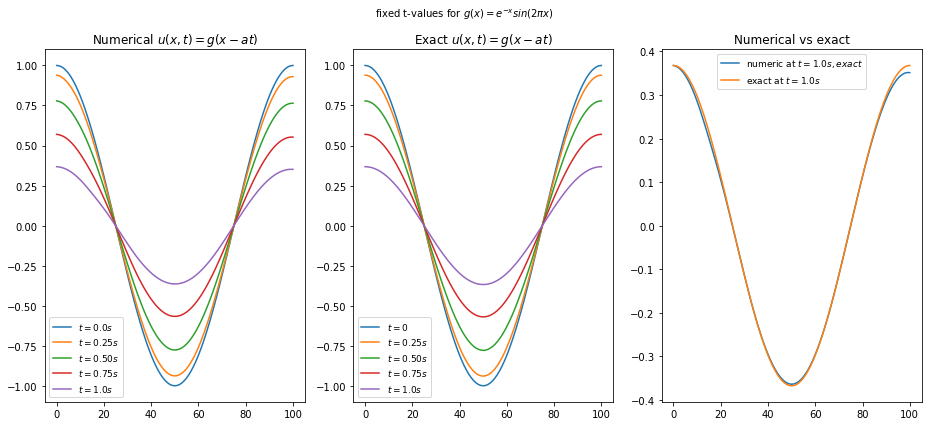

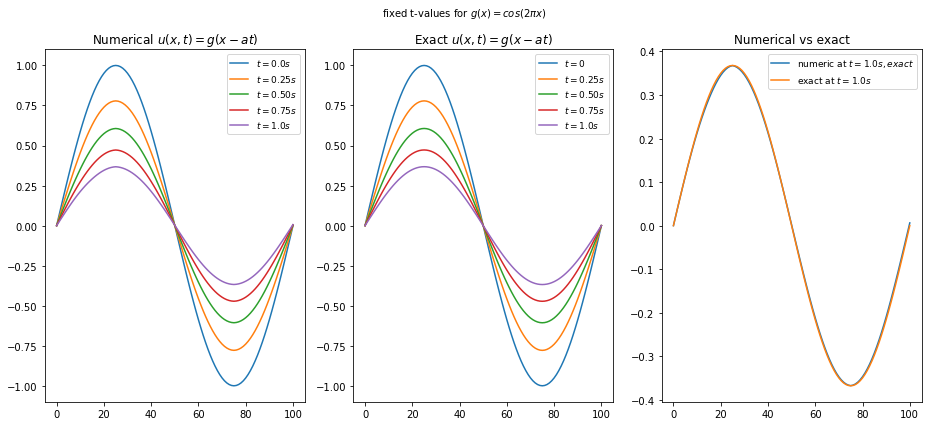

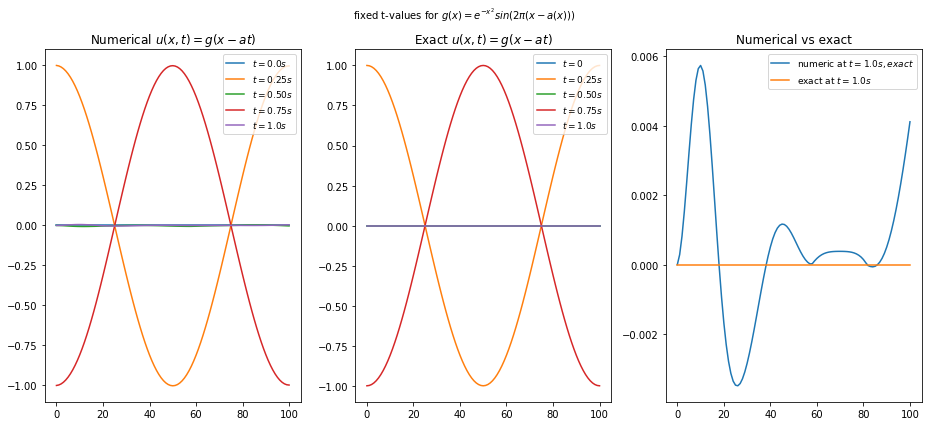

In [18]:
#To get perspective
def plot_func2(numeric, exact, title="Title", savefig="fixed t-values1"):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 6))
    fig.suptitle(title, fontsize=10)
    
    ax1.plot(numeric[:, 0], label=r'$t=0.0s$')
    ax2.plot(exact[:, 0], label=r'$t=0$')

    ax1.plot(numeric[:, int(N*1/4)], label=r'$t=0.25s$')
    ax2.plot(exact[:, int(N*1/4)], label=r'$t=0.25s$')

    ax1.plot(numeric[:, int(N*1/2)], label=r'$t=0.50s$')
    ax2.plot(exact[:, int(N*1/2)], label=r'$t=0.50s$')

    ax1.plot(numeric[:, int(N*3/4)], label=r'$t=0.75s$')
    ax2.plot(exact[:, int(N*3/4)], label=r'$t=0.75s$')
    
    ax1.plot(numeric[:, -1], label=r'$t=1.0s$')
    ax2.plot(exact[:, -1], label=r'$t=1.0s$')
    ax3.plot(numeric[:, -1], label=r'numeric at $t=1.0s, exact$')
    ax3.plot(exact[:, -1], label=r'exact at $t=1.0s$')
    
    ax1.set_title(r'Numerical $u(x, t)=g(x-at)$')
    ax2.set_title(r'Exact $u(x, t)=g(x-at)$')
    ax3.set_title(r'Numerical vs exact')
    ax1.legend(prop={'size': 9})
    ax2.legend(prop={'size': 9})
    ax3.legend(prop={'size': 9})
    fig.savefig(savefig)
    fig.tight_layout()
    fig.subplots_adjust(top=0.88)
    
plot_func2(RHS1, exactRHS1, title=r'fixed t-values for $g(x)=e^{-x}sin(2\pi x)$', savefig="fixed t-values1") 
plot_func2(RHS2, exactRHS2, title=r'fixed t-values for $g(x)=cos(2\pi x)$', savefig="fixed t-values2")
plot_func2(RHS3, exactRHS3, title=r'fixed t-values for $g(x)=e^{-x^2}sin(2\pi\left(x-a(x))\right)$', savefig="fixed t-values3")

In [19]:
#Define an error function for a given method in space
def error_func_h(solver, init, bc, a=simple_a, exact_func=exact_sol, RHS_func= lambda t, x: np.zeros((len(x), len(t)))):
    N=1000
    Ms=np.arange(3, 100,5)
    hs=1/Ms
    t=np.linspace(0, T, N+1)
    error= np.zeros(len(hs))
    for i in range(len(Ms)):
        u_numeric, temp = solver(Ms[i], T, N, init, bc, a, RHS_func)
        x=np.linspace(0, 1, Ms[i]+1)
        tt, xx=np.meshgrid(t, x)
        u_exact_ref = exact_func(init, xx, a, tt)
        error[i] = np.max( np.abs(u_numeric[-1, :] - u_exact_ref[-1, :] ))
    order = np.polyfit(np.log(hs),np.log(error),1)[0]
    return hs, error , order

h_RHS1, error_RHS1, order_RHS1 = error_func_h(upwind, init_RHS, bc_RHS, a=simple_a, exact_func=u_exact1, RHS_func=withRHS1)
h_RHS2, error_RHS2, order_RHS2 = error_func_h(upwind, init_RHS2, bc_RHS2, a=simple_a, exact_func=u_exact2, RHS_func=withRHS2)
h_RHS3, error_RHS3, order_RHS3 = error_func_h(upwind, init_RHS3, bc_RHS3, a=simple_a, exact_func=u_exact3, RHS_func=withRHS3)

In [20]:
Uref_k_RHS1, temp4 = upwind(20, T, 10000, init_RHS, bc_RHS, a=simple_a, RHS_func=withRHS1)
Uref_k_RHS2, temp5 = upwind(20, T, 10000, init_RHS2, bc_RHS2, a=simple_a, RHS_func=withRHS2)
Uref_k_RHS3, temp6 = upwind(20, T, 10000, init_RHS3, bc_RHS3, a=simple_a, RHS_func=withRHS3)

#Error function in time
def error_func_k(solver, init, bc, u_ref, a=simple_a, RHS_def= lambda t, x, a: np.zeros((len(x), len(t)))):
    Ms=20
    Ns=np.arange(3, 2000, 100)
    ks=1/Ns
    error=np.zeros(len(ks))
    for i in range(len(Ns)):
        u_numeric, temp = solver(Ms, T, Ns[i], init, bc, a=simple_a, RHS_func=RHS_def)
        error[i] = np.max(np.abs(u_numeric[:, -1] - u_ref[:, -1]))
    order=np.polyfit(np.log(ks), np.log(error), 1)[0]
    return ks, error, order

ks_RHS1, error_k_RHS1, order_k_RHS1= error_func_k(upwind, init_RHS, bc_RHS, Uref_k_RHS1, a=simple_a, RHS_def=withRHS1)
ks_RHS2, error_k_RHS2, order_k_RHS2= error_func_k(upwind, init_RHS2, bc_RHS2, Uref_k_RHS2, a=simple_a, RHS_def=withRHS2)
ks_RHS3, error_k_RHS3, order_k_RHS3= error_func_k(upwind, init_RHS3, bc_RHS3, Uref_k_RHS3, a=simple_a, RHS_def=withRHS3)

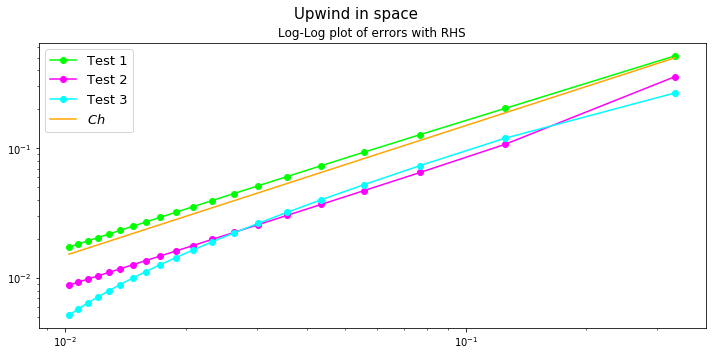

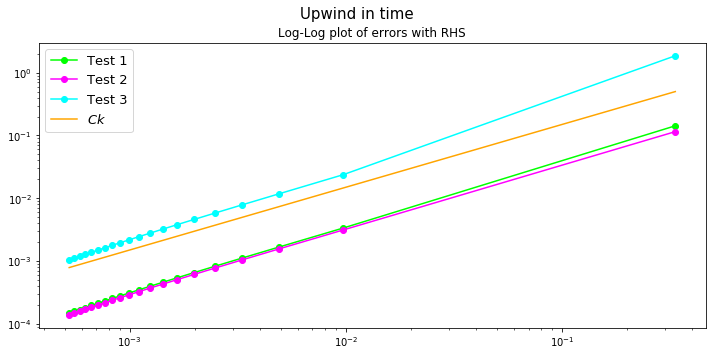

In [21]:
#log-log plots
def convergence_plot(arr1, arr2, arr3, ref, c=1.5, scheme="Scheme", time_or_space=r'$C$'):
    fig, (ax1) = plt.subplots(1, 1, figsize=(10, 5))
    fig.suptitle(scheme, fontsize=15)
    
    ax1.loglog(ref, arr1, 'o-', linestyle='-', color="lime", label="Test 1")
    ax1.loglog(ref, arr2, 'o-', linestyle='-', color="magenta", label="Test 2")
    ax1.loglog(ref, arr3, 'o-', linestyle='-', color="cyan", label="Test 3")
    ax1.loglog(ref, c*ref, color="orange", label=time_or_space)
    ax1.legend()
    ax1.legend(prop={'size': 13})
    ax1.set_title(r'Log-Log plot of errors with RHS')
    fig.savefig("Error plots Upwind")
    fig.tight_layout()
    fig.subplots_adjust(top=0.88)

convergence_plot(error_RHS1, error_RHS2, error_RHS3, h_RHS1, c=1.5, scheme="Upwind in space", time_or_space=r'$C h$') 
convergence_plot(error_k_RHS1, error_k_RHS2, error_k_RHS3, ks_RHS1, c=1.5, scheme="Upwind in time", time_or_space=r'$C k$')